# Notebook to compute the softening lenght and the number of particles of a simulation.


In [1]:
%pylab inline
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


## Things to take into account before runing the N-body simulations.

1. The mass of the particles of the Halo has to be equal to those of the disk, the bulge and the LMC.
2. Initialize the halos with the correct number of particles. 
3. Compute the softenig lenght for each simulation resolution, taking into account that the number of particles inside $R_{200}$

### to-do:

1. rm the python script and include that function in this notebook.
2. 

In [2]:
def N_disk_bulge_particles(N_halo, Mhalo, Mdisk, Mbulge, MLMC):
    """
    Compute the number of particles requiered in the disk,
    bulge and in the LMC given the mass of the particles 
    in the DM halo.
    
    Parameters:
    -----------
    N_halo: Number of particles in the DM Halo.
    Mhalo: Mass of the halo.
    Mdisk: Mass of the disk.
    Mbulge: Mass of the bulge.
    MLMC: Mass of the LMC.
    
    Returns:
    --------
    N_disk: Number of particles in the disk.
    N_bulge: Number of particles in the bulge.
    
    """
    
    N_disk = N_halo/Mhalo * Mdisk
    N_bulge = N_halo/Mhalo * Mbulge
    NLMC = N_halo/Mhalo * MLMC
    
    return N_disk, N_bulge, NLMC

def inter_particle_distance(N_part, R):
    """
    Compute the inter-particle distance in a sphere
    of radius R.        
    """
    
    V = 4/3.*np.pi*R**3.0
    V_part = V / N_part
    d_part = (V_part *3 / (4*np.pi))**(1./3.)
    return d_part

def optimal_softening(N_part, R200):
    """
    Eq 15 Power et al 2003
    
    Parameters:
    ----------
    
    N_part : Number of particles inside R
    R : R200 
    """
    e_opt = 4.* R200/N_part**0.5
    return e_opt

| Simulation       | $N_{part}$ DM Halo  | $N_{part}$ Disk | $N_{part}$ Bulge | $N_{part}$ LMC |
| ------------- |:-------------:| :-----:| :------: | :-----: | -----: |
| MWLMC3 (medium res) | $37.5$M  | $1382310$ | $337500$ | $2M$ |
| MWLMC4 (medium res) | $37.5$M  | $1382310$ | $337500$ | $2.5M$ |
| MWLMC5 (medium res) | $37.5$M  | $1382310$ | $337500$ | $4.5$M | 
| MWLMC6 (medium res) | $37.5$M  | $1382310$ | $335220$ | $6.25$M | 

In [5]:
N_disk_bulge_particles(30E6, 1.5E12, 5.52924E10, 1.34088E10, 0.8E11)

(1105848.0, 268176.0, 1600000.0000000002)

In [11]:
mp = 5.52924E10 /1382310.
Np_halo = 1.5E12 / mp
print(Np_halo)

37500000.0


In [4]:
!python3 virial_radius_particles.py '/media/ngaravito/4fb4fd3d-1665-4892-a18d-bdbb1185a07b/simulations/MW2_5M/MW2-5M_000.hdf5' 278 

python3: can't open file 'virial_radius_particles.py': [Errno 2] No such file or directory


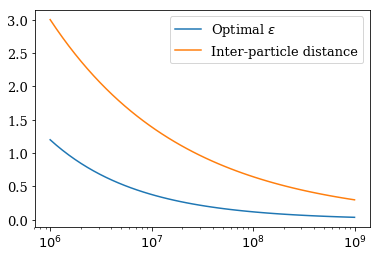

In [5]:
n_part = logspace(6, 9)
osl = zeros(len(n_part))
ipd = zeros(len(n_part))
for i in range(len(n_part)):
    osl[i] = optimal_softening(n_part[i], 300)
    ipd[i] = inter_particle_distance(n_part[i], 300)
    
semilogx(n_part, osl, label=r'Optimal $\epsilon$')
semilogx(n_part, ipd, label='Inter-particle distance')
legend()

In [7]:
optimal_softening(30E6, 300)

0.21908902300206642